In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Lấy dữ liệu

In [4]:
df = pd.read_csv('G:/NEU/BIG DATA/MID/df_final.csv')
df.head()

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,...,job,industry,title,director,country,rating,listed_in,Age,Time of day,Age Group
0,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074925,2019-05-06,1900-01-01 18:15:00,G04,3,...,student,computer,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo",United States,PG-13,"Action-Adventure, Fantasy, Science Fiction",20,Tối,Thanh niên (18-25)
1,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074924,2019-05-06,1900-01-01 18:15:00,G03,3,...,student,computer,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo",United States,PG-13,"Action-Adventure, Fantasy, Science Fiction",20,Tối,Thanh niên (18-25)
2,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097042,2019-05-22,1900-01-01 20:45:00,E04,2,...,student,health service,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),Chad Stahelski,United States,R,Action,21,Tối,Thanh niên (18-25)
3,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097041,2019-05-22,1900-01-01 20:45:00,E03,2,...,student,health service,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),Chad Stahelski,United States,R,Action,21,Tối,Thanh niên (18-25)
4,10130052019B0141,emp005,2019-05-30,90000,0000000034,20106761,2019-05-30,1900-01-01 19:30:00,F04,1,...,student,health service,NGÔI ĐỀN KỲ QUÁI (Pee Nak),Phontharis Chotkijsadarsopon,Thailand,PG-13,"Comedy, Horror",21,Tối,Thanh niên (18-25)


### Số lượng khách hàng theo độ tuổi

In [6]:
# Xoá trùng lặp theo customer_id
df_unique = df.drop_duplicates(subset='customerid')

# Đếm số lượng khách hàng theo độ tuổi
age_counts = df_unique.groupby('Age')['customerid'].count().reset_index()

# Đổi tên cột
age_counts.columns = ['Độ tuổi', 'Số lượng khách hàng']

# Sắp xếp tuổi theo thứ tự tăng dần 
age_counts = age_counts.sort_values(by='Độ tuổi').reset_index(drop=True)

#Tính tổng số lượng khách hàng
sum_cus = sum(age_counts['Số lượng khách hàng'])

# Bảng kết quả
print(age_counts)
print(f"Tổng: {' ' * 21} {sum_cus}")

    Độ tuổi  Số lượng khách hàng
0         0                    2
1         1                   10
2         2                    8
3         3                    2
4        10                    1
5        11                    6
6        12                    7
7        13                   26
8        14                   37
9        15                  103
10       16                  163
11       17                  221
12       18                  324
13       19                  368
14       20                  352
15       21                  367
16       22                  366
17       23                  316
18       24                  288
19       25                  230
20       26                  192
21       27                  158
22       28                  124
23       29                   74
24       30                   52
25       31                   44
26       32                   24
27       33                   23
28       34                   29
29       3

Ta thấy tổng số lượng khách hàng là 4049 khách hàng với lượng khách chủ yếu nằm trong độ tuổi thanh thiếu niên từ 15 đến 29 tuổi.

In [7]:
# Tính tổng số lượng khách hàng trong độ tuổi thanh thiếu niên từ 15-29 tuổi
nhomtuoi_15_29 = age_counts[(age_counts['Độ tuổi'] >= 15) & (age_counts['Độ tuổi'] <= 29)]['Số lượng khách hàng'].sum()

# Tính phần trăm số lượng khách hàng nằm trong độ tuổi từ 15-29 tuổi
percent = nhomtuoi_15_29 / sum_cus * 100
print(f"Tổng số lượng khách hàng từ 15 đến 29 tuổi là: {nhomtuoi_15_29} - Chiếm {percent}% tổng số khách hàng")

Tổng số lượng khách hàng từ 15 đến 29 tuổi là: 3646 - Chiếm 90.04692516670782% tổng số khách hàng


### Số lượng khách hàng theo giới tính

In [19]:
# Đếm số lượng khách hàng theo giới tính
gender_counts = df_unique.groupby('Gender')['customerid'].count().reset_index()

# Đổi tên cột
gender_counts.columns = ['Giới tính', 'Số lượng khách hàng']

# Hiển thị bảng kết quả
print(gender_counts)

# Tính số lượng khách hàng nam
nam_gender = gender_counts[(gender_counts['Giới tính'] == "Nam")]['Số lượng khách hàng'].values[0]
percent_nam_gender = nam_gender / sum_cus * 100
print(f"Tổng số lượng khách hàng nam là: {nam_gender} - Chiếm {percent_nam_gender}% tổng số khách hàng")

# Tính số lượng khách hàng nữ
percent_nu_gender = 100 - percent_nam_gender
print(f"Khách hàng nữ chiếm: {percent_nu_gender}% tổng số khách hàng")

  Giới tính  Số lượng khách hàng
0       Nam                 1845
1        Nữ                 2204
Tổng số lượng khách hàng nam là: 1845 - Chiếm 45.56680661891826% tổng số khách hàng
Khách hàng nữ chiếm: 54.43319338108174% tổng số khách hàng


Biểu đồ tỷ lệ khách hàng theo giới tính

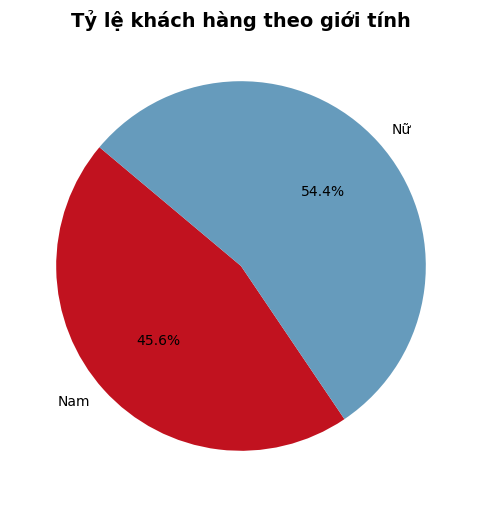

In [21]:
# Dữ liệu vẽ
labels = ['Nam', 'Nữ']
sizes = [percent_nam_gender, percent_nu_gender]
colors = ['#C1121F', '#669BBC']

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Tỷ lệ khách hàng theo giới tính', fontsize=14, fontweight='bold')
plt.show()

Ta thấy khách hàng nữ chiếm trọng số lớn hơn so với khách hàng nam trong tổng số lượng khách hàng.

### Số lượng khách hàng theo lĩnh vực

In [ ]:
# Đếm số lượng khách hàng theo lĩnh vực
industry_counts = df_unique.groupby('industry')['customerid'].count().reset_index()

# Đổi tên cột
industry_counts.columns = ['Lĩnh vực', 'Số lượng khách hàng']

# Sắp xếp theo số lượng khách hàng của từng lĩnh vực
industry_counts_sorted = industry_counts.sort_values(by='Số lượng khách hàng', ascending=True)

# Bảng kết quả
print(industry_counts_sorted)

           Lĩnh vực  Số lượng khách hàng
1      construction                  313
6  government agent                  318
2         economics                  325
8    social service                  339
4       engineering                  344
7    health service                  349
0          computer                  351
5           finance                  356
3         education                 1354


Biểu đồ số lượng khách hàng theo lĩnh vực

C:\Users\Dell\AppData\Local\Temp\ipykernel_15136\3559813160.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


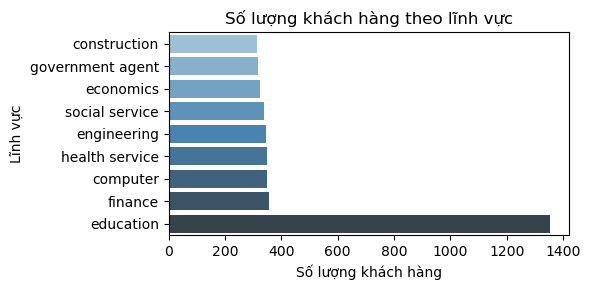

In [ ]:
# Cấu hình kích thước
plt.figure(figsize=(6, 3))

# Vẽ biểu đồ cột ngang
sns.barplot(
    data=industry_counts_sorted,
    x='Số lượng khách hàng',
    y='Lĩnh vực',
    palette='Blues_d'
)

# Thêm tiêu đề
plt.title('Số lượng khách hàng theo lĩnh vực')
plt.xlabel('Số lượng khách hàng')
plt.ylabel('Lĩnh vực')
plt.tight_layout()
plt.show()

Phần lớn số lượng khách hàng chủ yếu làm trong lĩnh vực Giáo dục (education). Các lĩnh vực còn lại, lượng khách hàng gần như là tương đương nhau.

### ARPU và ARPO

#### Doanh thu trung bình trên một khách hàng (ARPU)

In [8]:
# Tính tổng doanh thu
## Xoá trùng lặp orderid để mỗi đơn hàng chỉ tính 1 lần
df_orders = df.drop_duplicates(subset='orderid')

## Tính tổng doanh thu từ các đơn hàng duy nhất
total_revenue = df_orders['total'].sum()

# Tính doanh thu trung bình trên một khách hàng
averg_revenue_per_customer = total_revenue / sum_cus

# Kết quả
print(f"Doanh thu trung bình trên một khách hàng là: {averg_revenue_per_customer:,.0f} VND")

Doanh thu trung bình trên một khách hàng là: 398,689 VND


#### Doanh thu trung bình trên mỗi đơn hàng (ARPO)

In [9]:
# Tính doanh thu trung bình trên một đơn hàng
averg_revenue_per_order = total_revenue / len(df_orders)

# Hiển thị kết quả
print(f"Doanh thu trung bình trên một đơn hàng là: {averg_revenue_per_order:,.0f} VND")


Doanh thu trung bình trên một đơn hàng là: 115,571 VND


#### Nhận xét: Ta thấy chỉ số ARPU lớn hơn so với mức chi trung bình của người Việt Nam cho việc xem phim chiếu rạp. Ta sẽ đi phân tích số lượng vé đã đặt theo mã khách hàng để làm rõ nguyên nhân:

In [10]:
# Đếm số lượng vé đã đặt theo mã khách hàng
ord_by_cus_counts = df.groupby('customerid')['ticketcode'].count().reset_index()

# Đổi tên cột
ord_by_cus_counts.columns = ['Mã khách hàng', 'Số lượng vé đã đặt']

# Sắp xếp theo số lượng khách hàng của từng lĩnh vực
ord_by_cus_sorted = ord_by_cus_counts.sort_values(by='Số lượng vé đã đặt', ascending=False)

# Tỷ trọng số lượng vé đã đặt của từng khách hàng
total_tickets = df['ticketcode'].count()
ord_by_cus_sorted['Tỷ trọng(%)'] = ord_by_cus_sorted['Số lượng vé đã đặt'] / total_tickets * 100

# Bảng kết quả
print(ord_by_cus_sorted)

     Mã khách hàng  Số lượng vé đã đặt  Tỷ trọng(%)
3941     KH6166700               10132    29.829830
615     0000029127                7105    20.917977
2161    0001121703                 507     1.492669
3878     KH3742976                  54     0.158983
3624    0003004563                  52     0.153094
...            ...                 ...          ...
3423    0001186401                   1     0.002944
3116    0001167409                   1     0.002944
2246    0001122753                   1     0.002944
2243    0001122724                   1     0.002944
2024    0001119755                   1     0.002944

[4049 rows x 3 columns]


Một số khách hàng đặt mua vé với số lượng lớn cụ thể là ba mã Khách hàng KH6166700, 0000029127, 0001121703.

Phỏng đoán: những khách hàng này có thể là doanh nghiệp, tổ chức sự kiện, bên thứ 3 đặt vé theo lô/bán lại. Để tìm hiểu kỹ hơn, chúng ta sẽ xem lượng vé mua theo ngày của ba mã khách hàng này.

In [13]:
# Đếm số lượng vé đã đặt theo ngày của nhóm khách hàng đã đặt mua số lượng lớn

## Tạo danh sách 3 khách hàng 
selected_cus = ['KH6166700', '0000029127', '0001121703']

## Lọc dữ liệu 3 khách hàng
filt_df = df[df['customerid'].isin(selected_cus)]

ord_by_cus_counts_day = filt_df.groupby(['customerid','saledate'])['ticketcode'].count().reset_index()

## Đổi tên cột 
ord_by_cus_counts_day.columns = ['Mã khách hàng', 'Ngày bán', 'Số lượng vé đã đặt']

# Hiển thị kết quả
print(ord_by_cus_counts_day)

   Mã khách hàng    Ngày bán  Số lượng vé đã đặt
0     0000029127  2019-05-02                 158
1     0000029127  2019-05-03                  13
2     0000029127  2019-05-05                 239
3     0000029127  2019-05-06                 330
4     0000029127  2019-05-07                 256
..           ...         ...                 ...
75     KH6166700  2019-05-27                 221
76     KH6166700  2019-05-28                 153
77     KH6166700  2019-05-29                 149
78     KH6166700  2019-05-30                 125
79     KH6166700  2019-05-31                 371

[80 rows x 3 columns]


Ba mã khách hàng 0000029127, 0001121703, và KH6166700 đều có số lượng vé mua mỗi ngày rất lớn (có ngày hơn 300 vé), điều này cho thấy đây không phải là khách hàng cá nhân thông thường. Đây có thể là đối tác doanh nghiệp (B2B) hoặc đại lý bán vé, đặt nhiều vé cùng lúc cho nhân viên, trường học, tổ chức, hoặc các chương trình nhóm. Điều này dẫn đến ARPC bị đội lên cao và không phản ánh đúng hành vi của khách hàng cá nhân thông thường.

### Tần suất xem phim của khách hàng

In [35]:
# Loại trùng lặp giữa customerid và saledate
df_unique_visits = df.drop_duplicates(subset=['customerid', 'saledate'])

# Đếm số lần đến rạp (tức là số ngày khác nhau mỗi khách có giao dịch)
visit_counts = df_unique_visits['customerid'].value_counts().reset_index()
visit_counts.columns = ['customerid', 'visit_count']

print(visit_counts)

# Bảng phân phối tần suất khách đến rạp
count_distribution = visit_counts['visit_count'].value_counts().reset_index()
count_distribution.columns = ['Số lần đến rạp trong tháng','Số khách hàng']
print(count_distribution)

           customerid  visit_count
0           KH6166700           30
1          0000029127           29
2          0001121703           21
3          0001185815            9
4          0003009632            8
...               ...          ...
4044       0001077981            1
4045       0001077993            1
4046       0001078009            1
4047       0001078025            1
4048  WEBS00000046015            1

[4049 rows x 2 columns]
    Số lần đến rạp trong tháng  Số khách hàng
0                            1           2998
1                            2            727
2                            3            213
3                            4             69
4                            5             27
5                            6              8
6                            7              2
7                           30              1
8                           29              1
9                           21              1
10                           9              1
11 

Ta nhận thấy phần lớn khách hàng chỉ đến rạp 1-2 lần trong một tháng. Cụ thể, có 2.998 khách hàng (chiếm tỷ lệ rất lớn) chỉ đến 1 lần, và 727 khách đến 2 lần. Tần suất khách hàng đến rạp từ 3 lần trở lên trong tháng giảm dần. Bảng phân phối cho thấy hành vi tiêu dùng chủ yếu là không thường xuyên, phản ánh một tệp khách hàng vãng lai là chính.

Đặc biệt ba mã khách hàng 0000029127, 0001121703, và KH6166700 đến rạp rất nhiều lần trong tháng và mỗi lần đều mua số lượng vé rất lớn.

### Phân phối số lượng khách hàng ứng với số lượng vẽ đã đặt

In [48]:
# Đếm số lượng khách hàng ứng với số vẽ đã đặt
num_cus_by_ord = ord_by_cus_counts.groupby('Số lượng vé đã đặt')['Mã khách hàng'].count().reset_index()

# Đổi tên cột
num_cus_by_ord.columns = ['Số lượng vé đã đặt', 'Số lượng khách hàng']

# Kết quả
print(num_cus_by_ord)

    Số lượng vé đã đặt  Số lượng khách hàng
0                    1                  357
1                    2                 1532
2                    3                  433
3                    4                  639
4                    5                  263
5                    6                  242
6                    7                  134
7                    8                  126
8                    9                   68
9                   10                   58
10                  11                   32
11                  12                   25
12                  13                   30
13                  14                   25
14                  15                   20
15                  16                   16
16                  17                    8
17                  18                    6
18                  19                    8
19                  20                    2
20                  21                    4
21                  22          

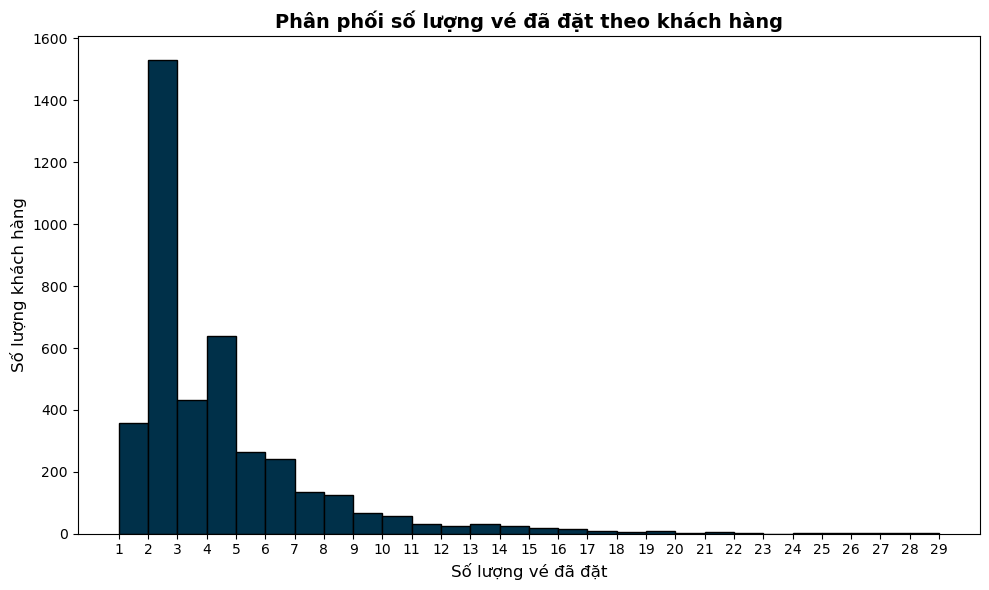

In [17]:
# Kích thước biểu đồ
plt.figure(figsize=(10, 6))
# Vẽ biểu đồ tần suất
plt.hist(
    ord_by_cus_counts['Số lượng vé đã đặt'],
    bins=range(1, 30),
    color='#003049',      # Màu cột
    edgecolor='black'     # Đường viền cột
)
# Tên trục
plt.title('Phân phối số lượng vé đã đặt theo khách hàng', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng vé đã đặt', fontsize=12)
plt.ylabel('Số lượng khách hàng', fontsize=12)

plt.xticks(range(1, 30))  # Hiển thị đầy đủ trục x
plt.tight_layout()
plt.show()

Phần lớn khách hàng chỉ mua từ 1 đến 4 vé trong cả tháng, với đỉnh phân phối tập trung tại mốc 2 vé, cho thấy xu hướng tiêu dùng chủ yếu ở mức thấp. Điều này phản ánh rằng nhóm khách hàng chính của rạp là các cá nhân, cặp đôi, hoặc là nhóm bạn nhỏ và đa số khách hàng chỉ đến rạp 1 lần trong tháng, thuộc nhóm khách vãng lai. Để làm rõ hơn mục này ta sẽ đi phân tích hành vi mua vé đơn - đôi - nhóm.

#### Số vé mỗi lần khách đến rạp

In [38]:
# Tính số vé mỗi lần khách đến rạp
tickets_per_visit = df.groupby(['customerid', 'saledate'])['ticketcode'].count().reset_index()
tickets_per_visit.columns = ['Mã khách hàng', 'Ngày mua', 'Số vé']

#Hiển thị kết quả
print(tickets_per_visit)

        Mã khách hàng    Ngày mua  Số vé
0          0000000014  2019-05-06      2
1          0000000034  2019-05-22      2
2          0000000034  2019-05-30      2
3          0000000081  2019-05-05      4
4          0000000098  2019-05-06      2
...               ...         ...    ...
5656        KH9855766  2019-05-31      2
5657        KH9958204  2019-05-25      3
5658  WEBS00000043900  2019-05-09      3
5659  WEBS00000044909  2019-05-30      4
5660  WEBS00000046015  2019-05-08      2

[5661 rows x 3 columns]


In [44]:
# Phân loại hành vi dựa trên số vé mỗi lần mua

def classify_visit(v):
    if v == 1:
        return 'Đi 1 mình'
    elif v == 2:
        return 'Đi đôi'
    elif 3 <= v <= 5:
        return 'Đi nhóm nhỏ (3-5 người)'
    elif 6 <= v < 10:
        return 'Đi nhóm lớn vừa (≥6 người)'
    else:
        return 'Đi nhóm lớn (≥ 10 người)'

tickets_per_visit['Hành vi'] = tickets_per_visit['Số vé'].apply(classify_visit)

In [45]:
# Đếm số lượt mỗi loại hành vi
visit_behavior_counts = tickets_per_visit['Hành vi'].value_counts().reset_index()
visit_behavior_counts.columns = ['Hành vi', 'Số lượt']

# Tính phần trăm
visit_behavior_counts['Tỷ lệ (%)'] = (visit_behavior_counts['Số lượt'] / visit_behavior_counts['Số lượt'].sum()) * 100

print(visit_behavior_counts)

                      Hành vi  Số lượt  Tỷ lệ (%)
0                      Đi đôi     2904  51.298357
1     Đi nhóm nhỏ (3-5 người)     1396  24.659954
2                   Đi 1 mình      779  13.760820
3  Đi nhóm lớn vừa (≥6 người)      383   6.765589
4    Đi nhóm lớn (≥ 10 người)      199   3.515280


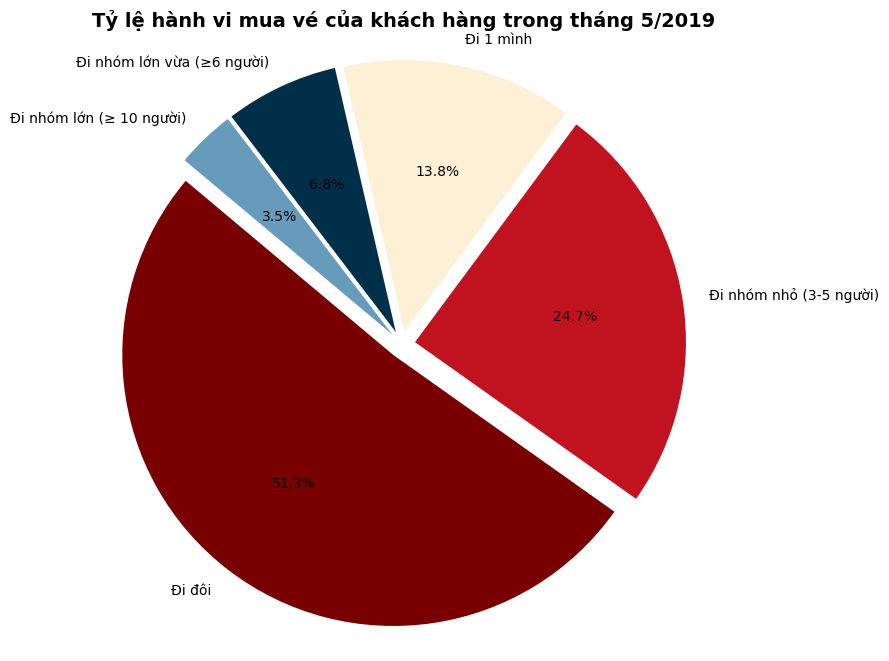

In [47]:
# Chuẩn bị dữ liệu
labels = visit_behavior_counts['Hành vi']
sizes = visit_behavior_counts['Số lượt']
colors = ['#780000', '#C1121F', '#FDF0D5', '#003049', '#669BBC']  # Màu sắc tùy chỉnh
explode = (0.05, 0.05, 0.05, 0.05, 0.05)  # Tách các phần một chút để nổi bật

# Vẽ biểu đồ tròn
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Tỷ lệ hành vi mua vé của khách hàng trong tháng 5/2019', fontsize = 14, fontweight = 'bold')
plt.axis('equal')  # Đảm bảo hình tròn đều
plt.show()

Biểu đồ cho thấy hành vi mua vé của khách hàng. Khách hàng có xu hướng đi xem phim đôi hoặc theo nhóm nhỏ (3-5 người) với hơn một nửa lượng khách hàng (51.3%) thích đi xem phim cùng bạn hoặc người yêu. Một nhóm nhỏ khách hàng (13.8%) có xu hướng thích đi xem phim một mình. Số lượng khách hàng đi theo nhóm lớn chủ yếu là do ba mã khách hàng 0000029127, 0001121703, và KH6166700 mua vé với số lượng lớn.

### Doanh thu theo nhóm tuổi

Ta sẽ chia tập khách hàng ra làm các nhóm: 0-3 tuổi, 4-15 tuổi (Trẻ em), 16-29 tuổi (Thanh thiếu niên), ≥30 tuổi (Trưởng thành và Trung niên)

In [65]:
# Xoá trùng lặp theo saledate
df_cus = df.drop_duplicates(subset='saledate')
# Chia tệp khách hàng ra làm bốn nhóm tuổi
def classify_age_group(age):
    if 0 <= age <= 3:
        return '0-3 tuổi'
    elif 4 <= age <= 15:
        return 'Trẻ em (4-15 tuổi)'
    elif 16 <= age <= 29:
        return 'Thanh thiếu niên (16-29 tuổi)'
    else:
        return 'Trưởng thành & Trung niên (>= 30 tuổi)'
    
df['age_group'] = df_unique['Age'].apply(classify_age_group)

In [66]:
# Tính tổng doanh thu theo nhóm tuổi và giới tính
revenue_by_age_gender = df.groupby(['age_group', 'Gender'])['total'].sum().reset_index()

# Đổi tên cột cho dễ hiểu
revenue_by_age_gender.columns = ['Nhóm tuổi', 'Giới tính', 'Tổng doanh thu']

# Xác định thứ tự mong muốn của các nhóm tuổi
age_order = [
    '0-3 tuổi',
    'Trẻ em (4-15 tuổi)',
    'Thanh thiếu niên (16-29 tuổi)',
    'Trưởng thành & Trung niên (>= 30 tuổi)'
]

# Ép cột 'Nhóm tuổi' thành dạng category có thứ tự
revenue_by_age_gender['Nhóm tuổi'] = pd.Categorical(revenue_by_age_gender['Nhóm tuổi'], categories=age_order, ordered=True)

# Sắp xếp theo nhóm tuổi đã được phân loại
revenue_by_age_gender_sorted = revenue_by_age_gender.sort_values(by='Nhóm tuổi')

# Kiểm tra kết quả
print(revenue_by_age_gender_sorted)


                                Nhóm tuổi Giới tính  Tổng doanh thu
0                                0-3 tuổi       Nam         1710000
1                                0-3 tuổi        Nữ          450000
6                      Trẻ em (4-15 tuổi)       Nam        12300000
7                      Trẻ em (4-15 tuổi)        Nữ        17820000
2           Thanh thiếu niên (16-29 tuổi)       Nam       173785000
3           Thanh thiếu niên (16-29 tuổi)        Nữ       215685000
4  Trưởng thành & Trung niên (>= 30 tuổi)       Nam        18135000
5  Trưởng thành & Trung niên (>= 30 tuổi)        Nữ        19710000


Biểu đồ doanh thu theo nhóm tuổi và giới tính

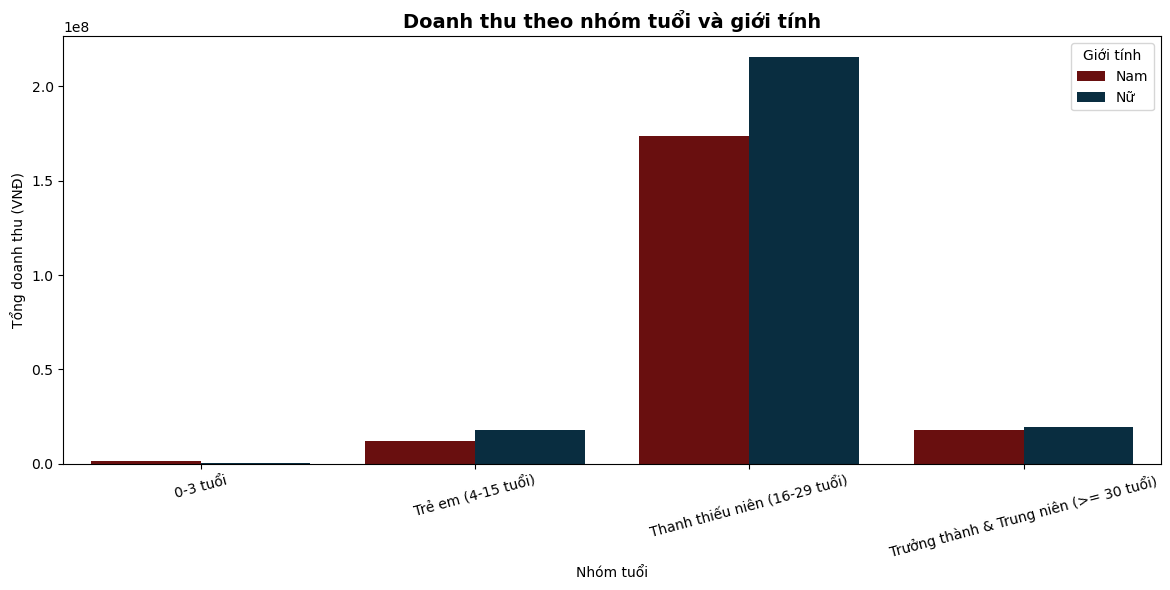

In [64]:
# Thiết lập kích thước
plt.figure(figsize=(12,6))

# Vẽ biểu đồ cột đôi (grouped bar chart)
sns.barplot(
    data=revenue_by_age_gender,
    x='Nhóm tuổi',
    y='Tổng doanh thu',
    hue='Giới tính',        # Nhóm theo giới tính
    palette=['#780000','#003049']         # Bộ màu xanh
)

# Tuỳ chỉnh hiển thị
plt.title('Doanh thu theo nhóm tuổi và giới tính', fontsize = 14, fontweight = 'bold')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Tổng doanh thu (VNĐ)')
plt.xticks(rotation=15)  # Xoay nhãn trục x nếu bị dài
plt.tight_layout()
plt.show()

Về nhóm tuổi: Doanh thu phần lớn đến từ nhóm tuổi thanh thiếu niên (16-29 tuổi) và một phần nhỏ đến từ hai nhóm Trẻ em (4-15 tuổi) và Trưởng thành & Trung niên (>= 30 tuổi). Một điểm đáng chú ý là doanh thu của nhóm khách hàng 0-3 tuổi hầu hết là doanh thu đến từ các mã khách hàng đi theo nhóm. Đặc biệt là các mã khách hàng như KH6166700 và 0001121703 đều mua vé với số lượng lớn tuy nhiên hai mã khách hàng này đều ghi nhận thông tin tuổi là 0 hoặc 1 tuổi dẫn đến việc ghi nhận thông tin về tuổi của khách hàng không được chính xác.

Về giới tính: Doanh thu cho thấy sự chênh lệch rõ rệt giữa nam và nữ ở cả ba nhóm tuổi do số lượng khách hàng nữ thường nhiều hơn nam.